<a href="https://colab.research.google.com/github/hellooishik/HIRAD_Loans_Data_Analysis/blob/main/HIRAD_Loans_Data_Analysis_Predicting_Loan_Approvals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1 : Install Required Libraries

In [1]:
!pip install pdfplumber pandas matplotlib seaborn openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 27.6 MB/s eta 0:00:00


# **Import Required Libraries**

In [2]:
import pdfplumber
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Upload & Extract Data from PDF**

In [3]:
from google.colab import files

# Upload the PDF file manually in Google Colab
uploaded = files.upload()

# Extract Data from PDF
def extract_pdf_data(pdf_path):
    with pdfplumber.open(pdf_path) as pdf:
        text = ""
        for page in pdf.pages:
            text += page.extract_text() + "\n"
    return text

# Extracted text from PDF
pdf_text = extract_pdf_data("HIRAD_Loans_Database.pdf")

# Print first 1000 characters to preview the content
print(pdf_text[:1000])


Saving HIRAD_Loans_Database.pdf to HIRAD_Loans_Database.pdf
Loan_ID Gender Married Dependents Graduate Self_Employed ApplicantIncome CoapplicantIncome LoanAmount Loan_Amount_Term Credit_History Property_Area Loan_Status
1002 1 0 0 1 0 5849 0 128 360 1 1 Y
1003 1 1 1 1 0 4583 1508 128 360 1 3 N
1005 1 1 0 1 1 3000 0 66 360 1 1 Y
1006 1 1 0 0 0 2583 2358 120 360 1 1 Y
1008 1 0 0 1 0 6000 0 141 360 1 1 Y
1011 1 1 2 1 1 5417 4196 267 360 1 1 Y
1013 1 1 0 0 0 2333 1516 95 360 1 1 Y
1014 1 1 3 1 0 3036 2504 158 360 0 2 N
1018 1 1 2 1 0 4006 1526 168 360 1 1 Y
1020 1 1 1 1 0 12841 10968 349 360 1 2 N
1024 1 1 2 1 0 3200 700 70 360 1 1 Y
1027 1 1 2 1 0 2500 1840 109 360 1 1 Y
1028 1 1 2 1 0 3073 8106 200 360 1 1 Y
1029 1 0 0 1 0 1853 2840 114 360 1 3 N
1030 1 1 2 1 0 1299 1086 17 120 1 1 Y
1032 1 0 0 1 0 4950 0 125 360 1 1 Y
1034 1 0 1 0 0 3596 0 100 240 0 1 Y
1036 2 0 0 1 0 3510 0 76 360 0 1 N
1038 1 1 0 0 0 4887 0 133 360 1 3 N
1041 1 1 0 1 0 2600 3500 115 360 1 1 Y
1043 1 1 0 0 0 7660 0 104

# **Load the Excel Data**

In [4]:
df_excel = pd.read_excel("HIRAD_Loans_Database.xlsx")
print(df_excel.head())  # Display first few rows

   Loan_ID  Gender  Married  Dependents  Graduate  Self_Employed  \
0     1002       1        0           0         1              0   
1     1003       1        1           1         1              0   
2     1005       1        1           0         1              1   
3     1006       1        1           0         0              0   
4     1008       1        0           0         1              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         128               360   
1             4583             1508.0         128               360   
2             3000                0.0          66               360   
3             2583             2358.0         120               360   
4             6000                0.0         141               360   

   Credit_History  Property_Area Loan_Status  
0               1              1           Y  
1               1              3           N  
2               1      

# **Clean the Loan Data**

In [5]:
# Remove duplicates based on Loan_ID
df_excel.drop_duplicates(subset="Loan_ID", inplace=True)

# Check for missing values
print(df_excel.isnull().sum())

# Fill missing LoanAmount with the median
df_excel["LoanAmount"].fillna(df_excel["LoanAmount"].median(), inplace=True)

# Convert categorical values to readable format
df_excel["Married"] = df_excel["Married"].map({1: "Married", 0: "Single"})
df_excel["Graduate"] = df_excel["Graduate"].map({1: "Yes", 0: "No"})
df_excel["Self_Employed"] = df_excel["Self_Employed"].map({1: "Yes", 0: "No"})
df_excel["Loan_Status"] = df_excel["Loan_Status"].map({"Y": "Approved", "N": "Rejected"})

# Check cleaned dataset
print(df_excel.head())


Loan_ID              0
Gender               0
Married              0
Dependents           0
Graduate             0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
   Loan_ID  Gender  Married  Dependents Graduate Self_Employed  \
0     1002       1   Single           0      Yes            No   
1     1003       1  Married           1      Yes            No   
2     1005       1  Married           0      Yes           Yes   
3     1006       1  Married           0       No            No   
4     1008       1   Single           0      Yes            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         128               360   
1             4583             1508.0         128               360   
2             3000                0.0          66               360   
3      

<ipython-input-5-b0239eded1c5>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_excel["LoanAmount"].fillna(df_excel["LoanAmount"].median(), inplace=True)


# **Step 2: Exploratory Data Analysis (EDA)**

**Check Data Summary**

In [6]:
df_excel.describe()

,Loan_ID,Gender,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1657.125628,1.178392,0.721106,5341.944724,1504.077387,145.371859,344.020101,0.791457,1.894472
std,371.764584,0.383324,1.011325,5723.445768,1850.253352,83.941460,63.458665,0.406778,0.786485
min,1002.000000,1.000000,0.000000,150.000000,0.000000,17.000000,36.000000,0.000000,1.000000
25%,1343.500000,1.000000,0.000000,2940.500000,0.000000,102.500000,360.000000,1.000000,1.000000
50%,1672.000000,1.000000,0.000000,3861.500000,1221.000000,128.000000,360.000000,1.000000,2.000000
75%,1954.750000,1.000000,1.000000,5688.000000,2332.250000,163.000000,360.000000,1.000000,3.000000
max,2281.000000,2.000000,3.000000,63337.000000,11300.000000,700.000000,480.000000,1.000000,3.000000


# **Loan Approval Rate**

<ipython-input-7-d8c893911176>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Loan_Status", data=df_excel, palette="viridis")


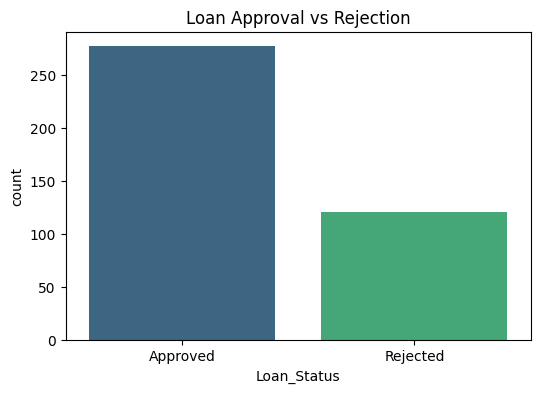

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Loan_Status", data=df_excel, palette="viridis")
plt.title("Loan Approval vs Rejection")
plt.show()

# **Loan Amount Distribution**

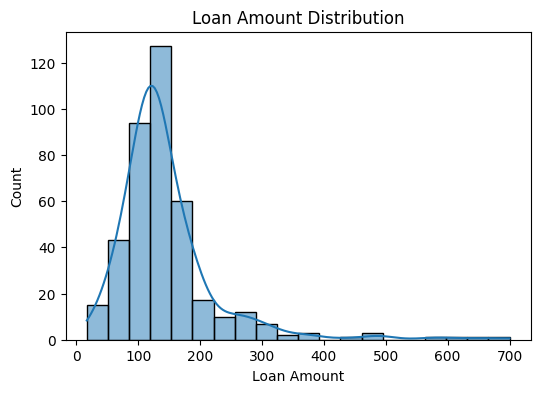

In [9]:
plt.figure(figsize=(6, 4))
sns.histplot(df_excel["LoanAmount"], bins=20, kde=True)
plt.title("Loan Amount Distribution")
plt.xlabel("Loan Amount")
plt.show()

# *Loan Status by Gender*

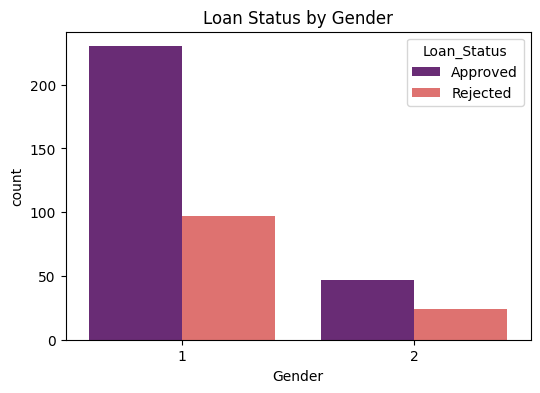

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Gender", hue="Loan_Status", data=df_excel, palette="magma")
plt.title("Loan Status by Gender")
plt.show()

*** Loan Approval by Property Area***

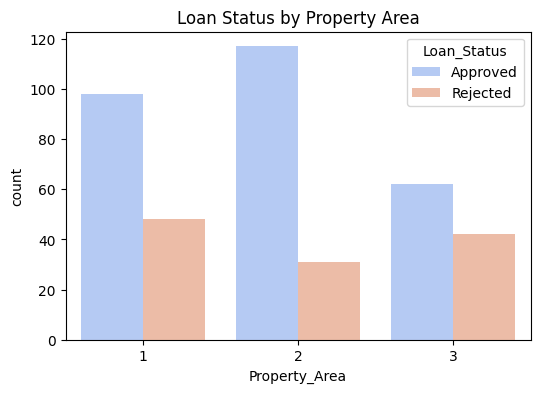

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Property_Area", hue="Loan_Status", data=df_excel, palette="coolwarm")
plt.title("Loan Status by Property Area")
plt.show()

# *Income Distribution of Applicants*

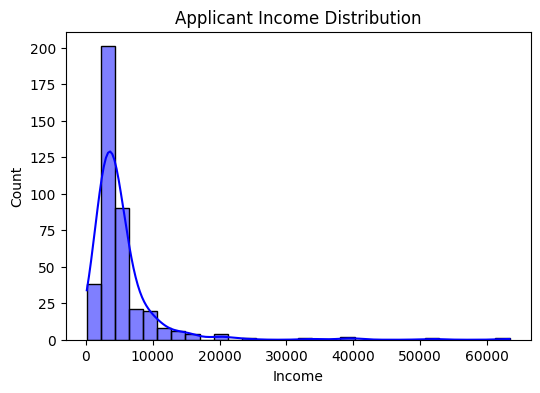

In [12]:
plt.figure(figsize=(6, 4))
sns.histplot(df_excel["ApplicantIncome"], bins=30, kde=True, color="blue")
plt.title("Applicant Income Distribution")
plt.xlabel("Income")
plt.show()

# **Step 4: Final Submission**

In [13]:
df_excel.to_csv("cleaned_loans_data.csv", index=False)